### Workflow
- Problem Definition
- Data Collection:
- Data Exploration and Cleaning:
- Feature Engineering:
- Model Evaluation and Refinement:
- Model Deployment and Monitoring:

### Problem Statement:
Many vehicle owners and fleet managers face challenges in maintaining optimal fuel efficiency while minimizing maintenance costs. Unexpected breakdowns, inefficient engine performance, and wear and tear on components can lead to increased fuel consumption and operational expenses.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("fuel.csv")

C:\Users\Harsh Gaddam\AppData\Local\Temp\ipykernel_17764\2721963490.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fuel.csv")


In [23]:
df.head()

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,fuel_type,city_mpg_ft1,highway_mpg_ft1,combined_mpg_ft1,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_ft1,tailpipe_co2_in_grams_mile_ft1,fuel_economy_score,my_mpg_data
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,Regular,17,24,20,1750,16.480500,-1,444.350000,-1,N
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,Regular,17,24,20,1750,16.480500,-1,444.350000,-1,N
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,Regular,18,25,21,1650,15.695714,-1,423.190476,-1,N
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,Regular,18,25,21,1650,15.695714,-1,423.190476,-1,N
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,Regular,18,17,17,2050,19.388824,-1,522.764706,-1,N


In [26]:
df.shape

(38113, 24)

In [32]:
df.columns

Index(['vehicle_id', 'year', 'make', 'model', 'class', 'drive', 'transmission',
       'transmission_type', 'engine_index', 'engine_descriptor',
       'engine_cylinders', 'engine_displacement', 'turbocharger',
       'supercharger', 'fuel_type', 'city_mpg_ft1', 'highway_mpg_ft1',
       'combined_mpg_ft1', 'annual_fuel_cost_ft1',
       'annual_consumption_in_barrels_ft1', 'tailpipe_co2_ft1',
       'tailpipe_co2_in_grams_mile_ft1', 'fuel_economy_score', 'my_mpg_data'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   vehicle_id                         38113 non-null  int64  
 1   year                               38113 non-null  int64  
 2   make                               38113 non-null  object 
 3   model                              38113 non-null  object 
 4   class                              38113 non-null  object 
 5   drive                              36924 non-null  object 
 6   transmission                       38102 non-null  object 
 7   transmission_type                  15045 non-null  object 
 8   engine_index                       38113 non-null  int64  
 9   engine_descriptor                  22693 non-null  object 
 10  engine_cylinders                   37977 non-null  float64
 11  engine_displacement                37979 non-null  flo

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_id,38113.0,19170.638496,11134.878665,1.00,9529.00000,19058.000000,28779.000000,38542.000000
year,38113.0,2000.194527,10.464573,1984.00,1991.00000,2001.000000,2009.000000,2017.000000
engine_index,38113.0,8799.389001,17781.058490,0.00,0.00000,212.000000,4451.000000,69102.000000
engine_cylinders,37977.0,5.736656,1.752254,2.00,4.00000,6.000000,6.000000,16.000000
engine_displacement,37979.0,3.317583,1.361995,0.00,2.20000,3.000000,4.300000,8.400000
supercharger,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_mpg_ft1,38113.0,17.981109,6.849728,6.00,15.00000,17.000000,20.000000,150.000000
highway_mpg_ft1,38113.0,24.080786,7.026649,9.00,20.00000,24.000000,27.000000,122.000000
combined_mpg_ft1,38113.0,20.216068,6.772655,7.00,17.00000,19.000000,23.000000,136.000000
annual_fuel_cost_ft1,38113.0,1970.675360,532.555234,500.00,1600.00000,1950.000000,2350.000000,6050.000000


In [30]:
df.isnull().sum()

vehicle_id                               0
year                                     0
make                                     0
model                                    0
class                                    0
drive                                 1189
transmission                            11
transmission_type                    23068
engine_index                             0
engine_descriptor                    15420
engine_cylinders                       136
engine_displacement                    134
turbocharger                         32874
supercharger                         38113
fuel_type                                0
city_mpg_ft1                             0
highway_mpg_ft1                          0
combined_mpg_ft1                         0
annual_fuel_cost_ft1                     0
annual_consumption_in_barrels_ft1        0
tailpipe_co2_ft1                         0
tailpipe_co2_in_grams_mile_ft1           0
fuel_economy_score                       0
my_mpg_data

<Axes: >

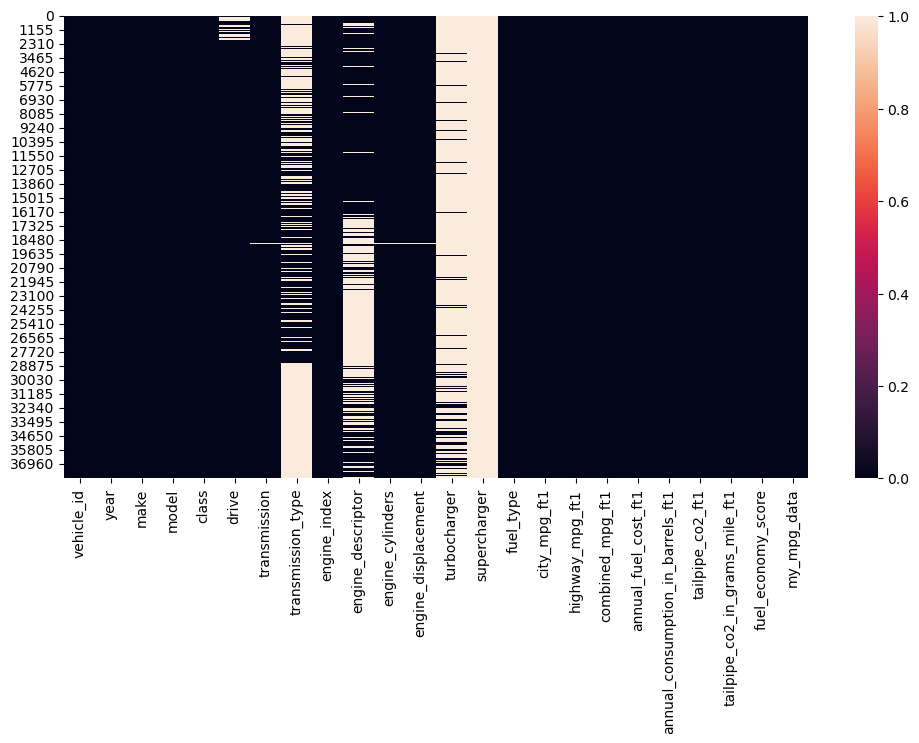

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())

In [31]:
df.duplicated().sum()

0

In [35]:
len(df["make"].unique())

133

In [37]:
len(df["model"].unique())

3748

In [38]:
df["model"].unique()

array(['GT V6 2.5', 'Spider Veloce 2000', 'DJ Po Vehicle 2WD', ...,
       'S90 FWD', 'V60 Polestar AWD', 'V90 CC AWD'], dtype=object)

In [41]:
df["class"].unique()

array(['Minicompact Cars', 'Two Seaters', 'Special Purpose Vehicle 2WD',
       'Special Purpose Vehicle 4WD', 'Subcompact Cars', 'Midsize Cars',
       'Midsize Station Wagons', 'Compact Cars',
       'Midsize-Large Station Wagons', 'Large Cars',
       'Small Station Wagons', 'Standard Pickup Trucks 2WD',
       'Vans, Passenger Type', 'Vans, Cargo Type',
       'Standard Pickup Trucks 4WD', 'Special Purpose Vehicles',
       'Small Pickup Trucks 2WD', 'Small Pickup Trucks 4WD', 'Vans',
       'Standard Pickup Trucks', 'Small Pickup Trucks', 'Vans Passenger',
       'Standard Pickup Trucks/2wd', 'Special Purpose Vehicles/2wd',
       'Special Purpose Vehicles/4wd', 'Sport Utility Vehicle - 4WD',
       'Sport Utility Vehicle - 2WD', 'Minivan - 2WD', 'Minivan - 4WD',
       'Special Purpose Vehicle', 'Small Sport Utility Vehicle 4WD',
       'Small Sport Utility Vehicle 2WD',
       'Standard Sport Utility Vehicle 4WD',
       'Standard Sport Utility Vehicle 2WD'], dtype=object)

In [44]:
df["drive"].unique()

array([nan, '2-Wheel Drive', '4-Wheel or All-Wheel Drive',
       'Rear-Wheel Drive', 'Front-Wheel Drive', '4-Wheel Drive',
       'All-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)

In [45]:
df["transmission"].unique()

array(['Manual 5-Speed', 'Automatic 3-Speed', 'Manual 4-Speed',
       'Automatic 4-Speed', 'Manual 3-Speed', 'Manual 4-Speed Doubled',
       nan, 'Automatic (S4)', 'Manual 5 Speed', 'Manual 6-Speed',
       'Automatic (variable gear ratios)', 'Automatic 5-Speed',
       'Automatic (S5)', 'Auto(L4)', 'Auto(L3)', 'Automatic (A1)',
       'Automatic 6-Speed', 'Automatic (S6)', 'Automatic 7-Speed',
       'Automatic (S7)', 'Automatic (S8)', 'Automatic (AV)', 'Auto(AM7)',
       'Automatic (AM5)', 'Auto(AM6)', 'Automatic (AM6)',
       'Automatic (A6)', 'Auto(AV-S7)', 'Manual 7-Speed', 'Auto (AV-S6)',
       'Auto (AV-S8)', 'Automatic (AV-S6)', 'Auto(AV-S6)', 'Auto(AM5)',
       'Auto (AV)', 'Auto(AV-S8)', 'Automatic 8-Speed', 'Auto(AM-S6)',
       'Auto(AM-S7)', 'Automatic 6Speed', 'Automatic 9-Speed',
       'Automatic (S9)', 'Auto(AM-S8)', 'Auto(AM8)', 'Manual(M7)',
       'Auto(AM-S9)', 'Automatic (S10)'], dtype=object)

In [46]:
df["transmission_type"].unique()

array([nan, 'Creeper', 'SIL', 'Overdrive', 'Lockup', 'VLKUP', '2MODE',
       '2MODE 2LKUP', '3LKUP', '2LKUP', 'CLKUP', '2MODE 3LKUP',
       'fuel injection', 'SIL Creeper', 'DC/FW', 'Lockup A3',
       '2MODE CLKUP', 'EMS 2MODE CLKU', 'EMS', '3MODE VLKUP', '4MODE',
       '3MODE CLKUP', 'SIL CMODE', '2MODE VLKUP', 'EMS 2MODE CLKUP',
       'EMS 5MODE', 'EMS 2MODE', '2MODE DC/FW', 'Elec Overdrive',
       'Mech Overdrive', '3MODE', 'CMODE', 'EMS 3MODE', '2MODE CLKUP FW',
       '3MODE 2LKUP', 'VMODE CLKUP', 'EMS CLKUP', 'EMS CMODE CLKUP',
       'SIL CLKUP', 'CMODE CLKUP', 'VMODE', 'EMS 3MODE CLKUP',
       '4MODE CLKUP', '6MODE', 'SIL EMS', 'VMODE VLKUP', '6MODE CLKUP',
       'SIL 3MODE', 'LONG RATIO', 'CMODE VLKUP', 'SIL 3MODE CLKUP',
       '3MODE CLKUP FW', 'SIL 2MODE CLKUP'], dtype=object)

In [47]:
df["engine_index"]

0        9001
1        9005
2        9002
3        9006
4        1830
         ... 
38108      90
38109      52
38110      53
38111      54
38112      50
Name: engine_index, Length: 38113, dtype: int64